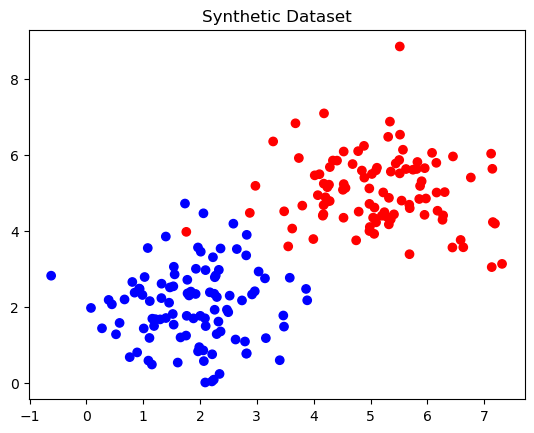

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Class 0
class_0_points = np.random.normal(loc=[2, 2], scale=[1, 1], size=(100, 2))
labels_class_0 = np.zeros((100, 1))

# Class 1
class_1_points = np.random.normal(loc=[5, 5], scale=[1, 1], size=(100, 2))
labels_class_1 = np.ones((100, 1))

# Concatenate and shuffle the dataset
synthetic_data = np.concatenate([class_0_points, class_1_points], axis=0)
labels = np.concatenate([labels_class_0, labels_class_1], axis=0)

# Shuffle the dataset
indices = np.arange(len(synthetic_data))
np.random.shuffle(indices)

synthetic_data = synthetic_data[indices]
labels = labels[indices]

# Visualize the synthetic dataset
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], c=labels.flatten(), cmap=plt.cm.bwr)
plt.title("Synthetic Dataset")
plt.show()


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(synthetic_data, labels, test_size=0.2, random_state=42)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
10/10 [==============================] - 2s 49ms/step - loss: 0.8144 - accuracy: 0.4062 - val_loss: 0.7369 - val_accuracy: 0.2750
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6999 - accuracy: 0.4000 - val_loss: 0.6629 - val_accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6453 - accuracy: 0.5000 - val_loss: 0.6296 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6207 - accuracy: 0.5000 - val_loss: 0.6121 - val_accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6040 - accuracy: 0.5000 - val_loss: 0.5981 - val_accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5898 - accuracy: 0.5000 - val_loss: 0.5833 - val_accuracy: 0.5000
Epoch 7/50
10/10 [==============================] - 0s 9ms/step - loss: 0.5752 - accuracy: 0.5063 - val_loss: 0.5682 - val_accuracy: 0.5250
Epoch 8/50
10/10 [=

2/2 [==============================] - 0s 9ms/step - loss: 0.1207 - accuracy: 1.0000
Test Accuracy: 100.00%
341/341 [==============================] - 1s 2ms/step


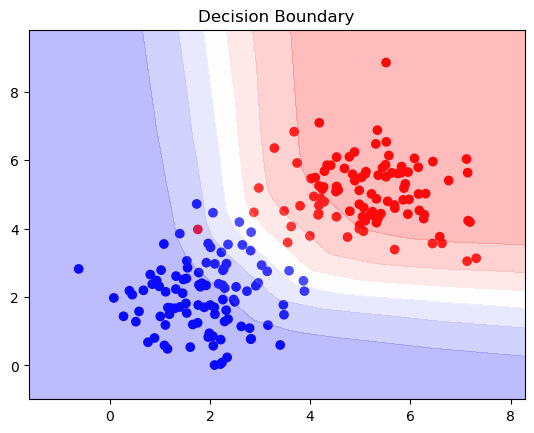

In [5]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Visualize the decision boundary
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], c=labels.flatten(), cmap=plt.cm.bwr)
plt.title("Decision Boundary")

x_min, x_max = synthetic_data[:, 0].min() - 1, synthetic_data[:, 0].max() + 1
y_min, y_max = synthetic_data[:, 1].min() - 1, synthetic_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
plt.show()


Epoch 1/50
10/10 [==============================] - 0s 19ms/step - loss: 0.1323 - accuracy: 0.9875 - val_loss: 0.1171 - val_accuracy: 1.0000
Epoch 2/50
10/10 [==============================] - 0s 11ms/step - loss: 0.1294 - accuracy: 0.9875 - val_loss: 0.1140 - val_accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 0s 12ms/step - loss: 0.1261 - accuracy: 0.9875 - val_loss: 0.1106 - val_accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 0.1229 - accuracy: 0.9875 - val_loss: 0.1075 - val_accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 0.1198 - accuracy: 0.9937 - val_loss: 0.1046 - val_accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.1177 - accuracy: 0.9875 - val_loss: 0.1023 - val_accuracy: 0.9750
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 0.1145 - accuracy: 0.9875 - val_loss: 0.0994 - val_accuracy: 1.0000
Epoch 8/50
10/

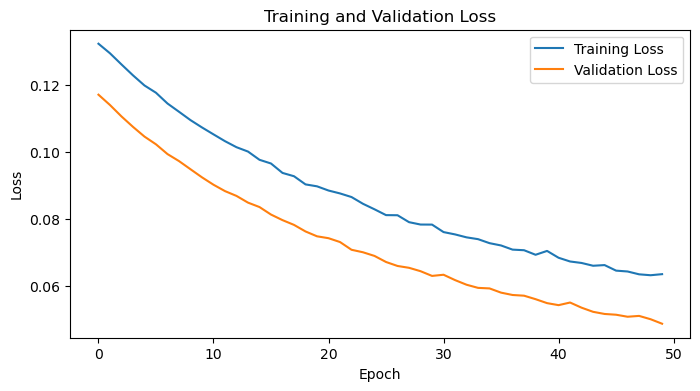

In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

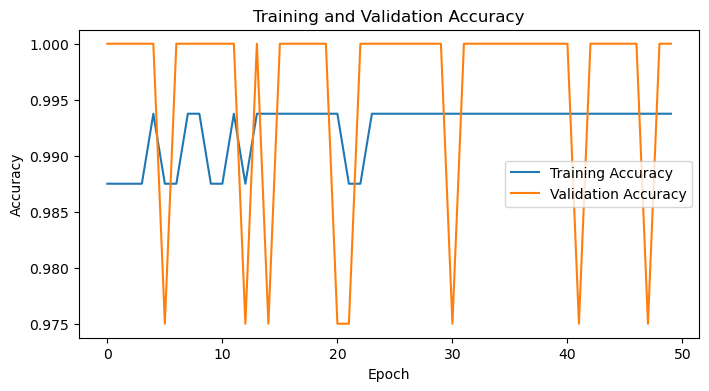

In [8]:
# Accuracy Curve
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

341/341 [==============================] - 1s 2ms/step


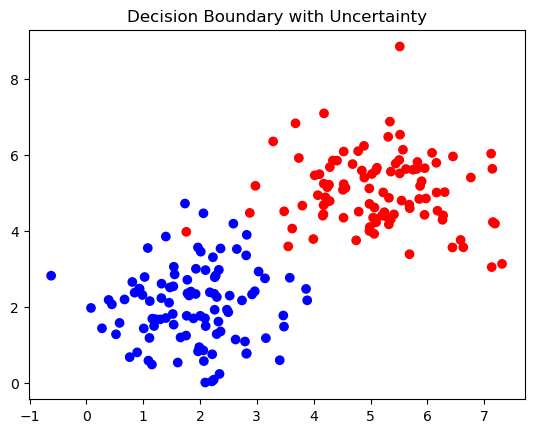

In [9]:
# Uncertainty Visualization
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], c=labels.flatten(), cmap=plt.cm.bwr)
plt.title("Decision Boundary with Uncertainty")

x_min, x_max = synthetic_data[:, 0].min() - 1, synthetic_data[:, 0].max() + 1
y_min, y_max = synthetic_data[:, 1].min() - 1, synthetic_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

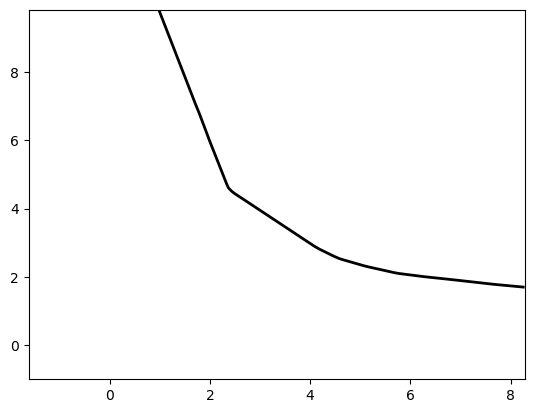

In [10]:
# Plot uncertainty as contour lines
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')

plt.show()

2/2 [==============================] - 0s 5ms/step


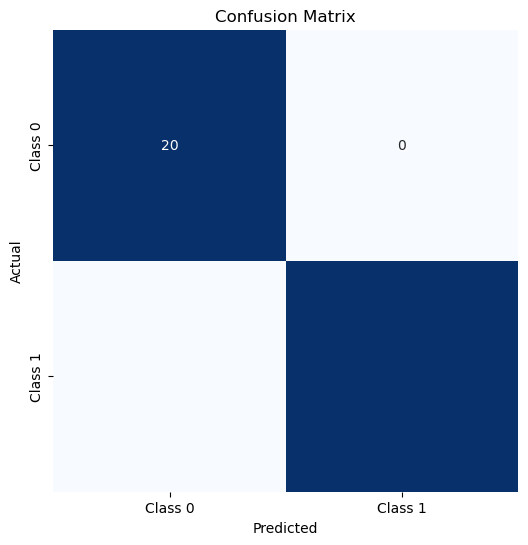

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


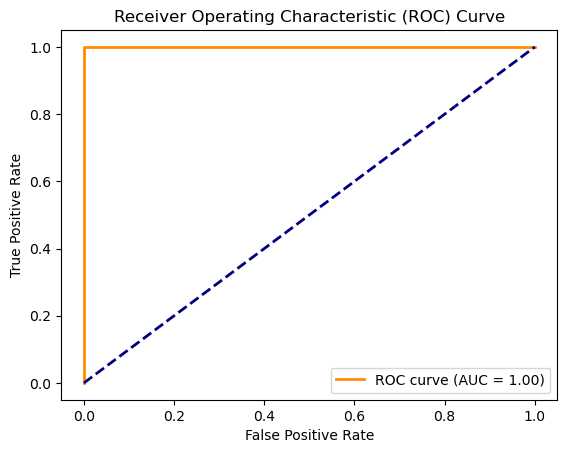

In [12]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


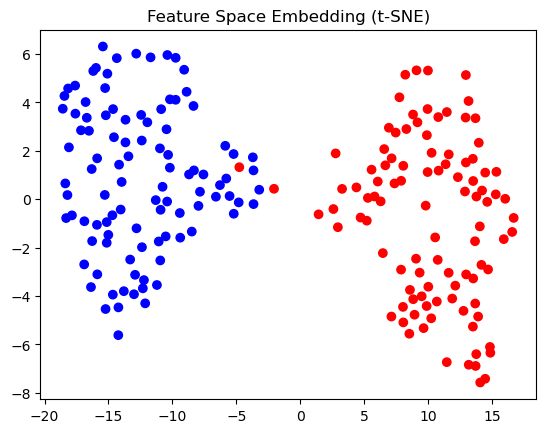

In [14]:
from sklearn.manifold import TSNE

# Fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedded_points = tsne.fit_transform(synthetic_data)

# Plot the embedded feature space
plt.scatter(embedded_points[:, 0], embedded_points[:, 1], c=labels.flatten(), cmap=plt.cm.bwr)
plt.title('Feature Space Embedding (t-SNE)')
plt.show()
